In [1]:
import os
root = os.path.join('..')
data_root = os.path.join(root, 'data')
dataset_root = os.path.join(root, '..', 'datasets')
fig_root = os.path.join(root, 'figs')

import sys
sys.path.append(root)

In [2]:
from typing import List

import torch
from torch import Tensor

from utils.fig import Axes, Figure
from utils.theory import calc_adv_threshold, calc_str_adv_threshold

In [3]:
Figure.set_seaborn_theme()
Figure.set_tex()
Figure.set_high_dpi()

In [4]:
d = 20
lam = .1
print(calc_adv_threshold(d, lam))
print(calc_str_adv_threshold(d, lam))

0.0975
0.9434169278996865


In [5]:
d = 100
lam = .1
print(calc_adv_threshold(d, lam))
print(calc_str_adv_threshold(d, lam))

0.059500000000000004
0.7642857142857142


In [6]:
def show(
    std_fname: str,
    adv_fname: str,
    str_adv_fname: str,
    ticks: List[int],
    shrink: float,
    linewidths: bool,
    save_name: str,
) -> None:

    f = Figure(1, 6, (7, 1.5))

    load = lambda fname: torch.load(os.path.join(data_root, 'train', fname, 'params'))

    def embed(ax: Axes, weight: Tensor, xlabel: str, cbar: bool = False) -> None:
        kwargs = {
            'map': weight,
            'vmin': 0,
            'vmax': 1,
            'cmap': Figure.color_map_blue_to_white_to_red,
            'cbar': False,
            'square': True
        }
        if linewidths:
            kwargs['linewidths'] = .01
        if cbar:
            kwargs['cbar'] = True
            kwargs['cbar_kws'] = {'ticks': (0, .5, 1), 'shrink': shrink}
        ax.heatmap(**kwargs)
        ax.set_xlabel(xlabel)
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_xticks_pad(-3)

    std_weights = load(std_fname)

    embed(f.axes[0][0], std_weights['P'], 'Std. $P$')
    embed(f.axes[0][1], std_weights['Q'], 'Std. $Q$')

    adv_weights = load(adv_fname)

    embed(f.axes[0][2], adv_weights['P'], 'Adv. $P$')
    embed(f.axes[0][3], adv_weights['Q'], 'Adv. $Q$')

    str_adv_weights = load(str_adv_fname)

    embed(f.axes[0][4], str_adv_weights['P'], 'Str. adv. $P$')
    embed(f.axes[0][5], str_adv_weights['P'], 'Str. adv. $Q$', True)

    f.axes[0][0].set_yticks(ticks)
    f.axes[0][0].set_yticklabels(ticks)
    f.axes[0][0].set_yticks_pad(-3)
    for i in range(1, 6):
        f.axes[0][i].remove_yticks()
        f.axes[0][i].set_yticks_pad(-3)

    Figure.save(fig_root, save_name)
    Figure.show()
    Figure.close()

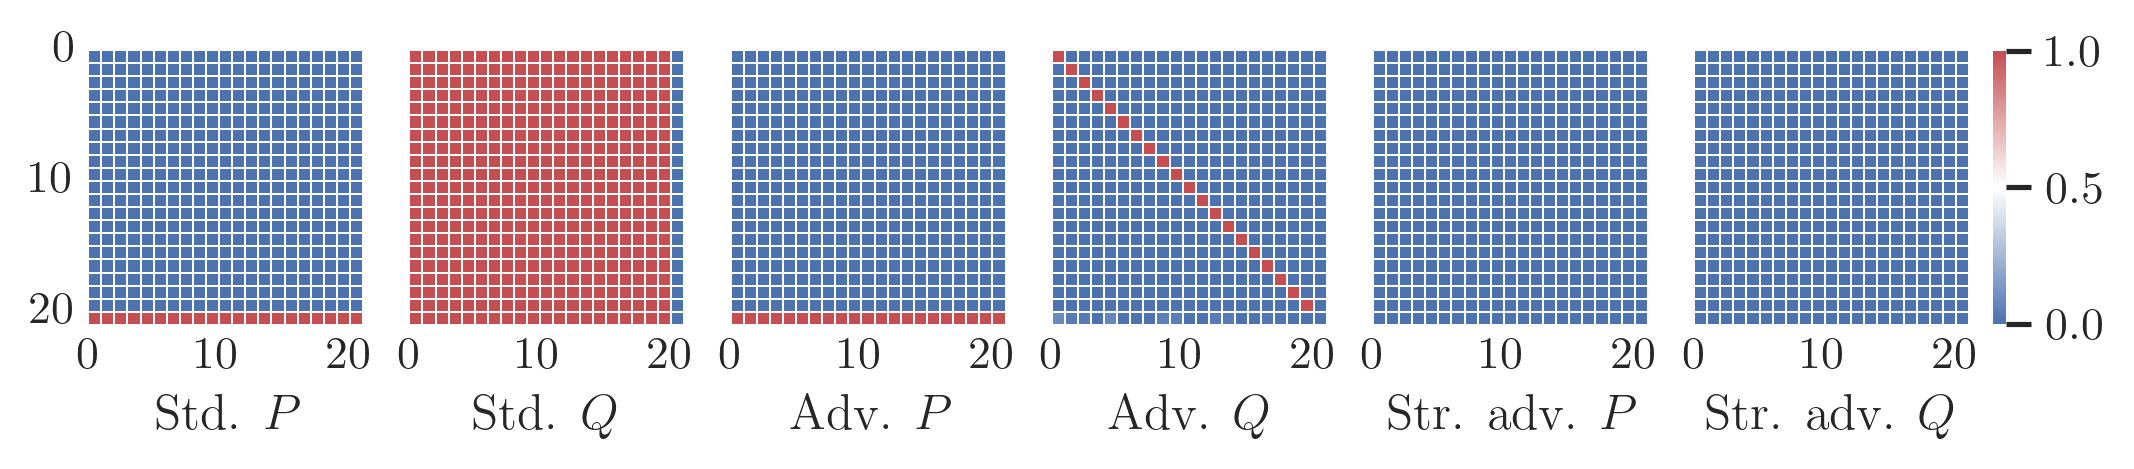

In [7]:
show(
    'batch_size=1000_d=20_N=1000_lam=0.1_eps=0.0_epochs=100_lr=0.1_seed=0',
    'batch_size=1000_d=20_N=1000_lam=0.1_eps=0.098_epochs=100_lr=0.1_seed=0',
    'batch_size=1000_d=20_N=1000_lam=0.1_eps=0.95_epochs=100_lr=0.1_seed=0',
    [0, 10, 20],
    .73,
    True,
    'weights.pdf',
)

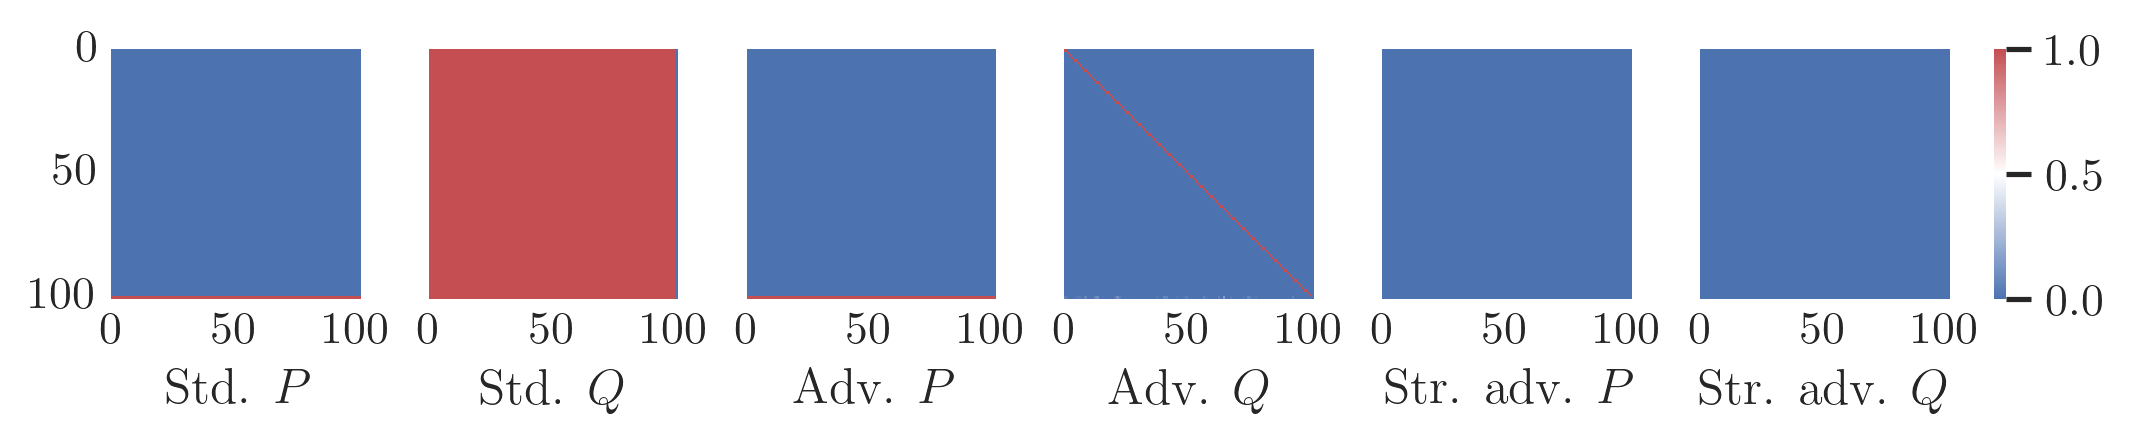

In [8]:
show(
    'batch_size=1000_d=100_N=1000_lam=0.1_eps=0.0_epochs=100_lr=1.0_seed=0',
    'batch_size=1000_d=100_N=1000_lam=0.1_eps=0.06_epochs=100_lr=0.2_seed=0',
    'batch_size=1000_d=100_N=1000_lam=0.1_eps=0.77_epochs=100_lr=1.0_seed=0',
    [0, 50, 100],
    .64,
    False,
    'weights_large.pdf',
)